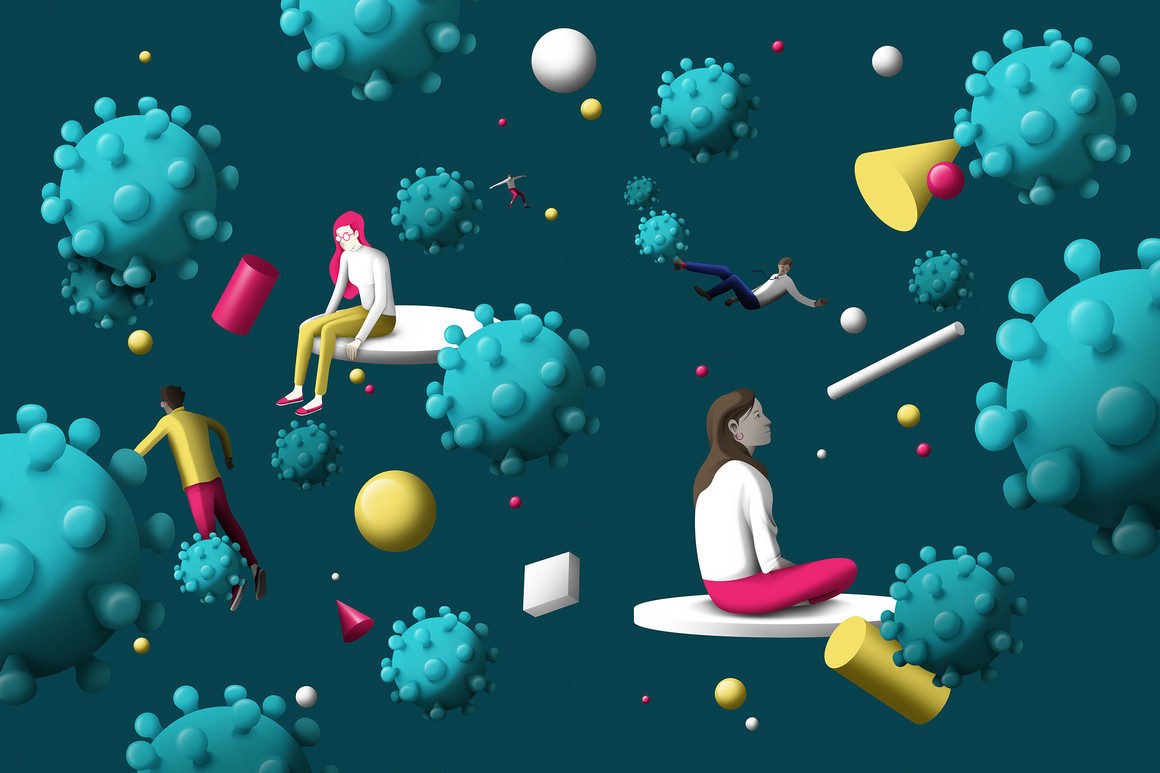

COVID-19 has brough the whole world at standstill.The economy drop, many people are getting jobless and
many dangerous impacts have been seen due to the affect of Pandemic. There is another domain which are 
heavliy affected by it i.e the Students Life due to COVID-19, many students are having stress,health and 
weight issues dure to this Pandemic. Let's us see how this is impacted Delhi-NCR and Outside its region.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import time
import scipy.stats as stats
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',2000, 'display.max_columns',100)
Students_Life = pd.read_csv("../input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv")
Students_Life.shape

In [ ]:
Students_Life.head()

In [ ]:
Students_Life.shape

## Data Pre-Processing

In [ ]:
#Filling Nan Values
Students_Life['Rating of Online Class experience'] = Students_Life['Rating of Online Class experience'].fillna("No Rating")
Students_Life['Medium for online class'] = Students_Life['Medium for online class'].fillna("No Medium")

In [ ]:
#Change the Nan in Time Spent on TV
Students_Life['Time spent on TV'].astype(str)
print("         ")
print("Time spent on TV:-",Students_Life['Time spent on TV'].nunique(),Students_Life['Time spent on TV'].unique())
print("         ")
#converting Nan, N,N,No Tv values
Students_Life['Time spent on TV']=Students_Life['Time spent on TV'].replace(['N','n',' ','No tv'],['0','0','0','0'])
Students_Life['Prefered social media platform']=Students_Life['Prefered social media platform'].replace(['Whatsapp','WhatsApp'],'Whatsapp')
Students_Life['Prefered social media platform']=Students_Life['Prefered social media platform'].replace(['None','None '],'None')
Students_Life['Time spent on TV'] = pd.to_numeric(Students_Life['Time spent on TV'],errors='coerce')
Students_Life['Time spent on TV'] = Students_Life['Time spent on TV'].astype(float)
print("         ")
print("Time spent on TV:-",Students_Life['Time spent on TV'].nunique(),Students_Life['Time spent on TV'].unique())


In [ ]:
#Change the name of the Age of Subject to Age of Student
Students_Life = Students_Life.rename(columns={'Age of Subject':'Age of Students'})

In [ ]:
Students_Life.head()

In [ ]:
#Students_Life = Students_Life.rename(columns={'Do you find yourself more connected with your family, close friends , relatives ?':'Connected to Any Dear Ones'},inplace = True)

In [ ]:
#Adding new Column
Age_Group = []
for i in Students_Life['Age of Students']:
    if i >= 7 and i < 18:
        Age_Group.append('7-17')
    elif i >= 18 and i < 23:
        Age_Group.append('18-22')
    elif i >=23:
        Age_Group.append('23-')
Students_Life['Age_Group'] = Age_Group

In [ ]:
#Adding new Column
Degree = []
for i in Students_Life['Age of Students']:
    if i >= 7 and i < 18:
        Degree.append('Primary or Secondary School')
    elif i >= 18 and i < 23:
        Degree.append('Bachloers')
    elif i >=23:
        Degree.append('Above Bachloers')
Students_Life['Degree'] = Degree

In [ ]:
Students_Life.head()

In [ ]:
Students_Life = Students_Life[['Region of residence','Age of Students','Age_Group','Degree','Time spent on Online Class','Rating of Online Class experience','Medium for online class','Time spent on self study','Time spent on fitness','Time spent on sleep','Time spent on social media','Prefered social media platform','Time spent on TV','Number of meals per day','Change in your weight','Health issue during lockdown','Stress busters','Time utilized','What you miss the most']]
Students_Life.shape

We Have droped the 'Do you find yourself more connected with your family, close friends , relatives ?' as we were not able to process it. so the count of column should be 19, after dropping it it is 18.

In [ ]:
Students_Life.head()

## Overall Students From Region

In [ ]:


labels = Students_Life['Region of residence'].value_counts().keys().tolist()
values = Students_Life['Region of residence'].value_counts().tolist()

colors = ['Blue ', 'Red']

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=25,hole=.3,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Overall Students From Region')
fig.show()



## Agewise Students Affected by COVID-19

In [ ]:
fig = px.histogram(Students_Life, x="Age of Students")
fig.update_traces(marker_color='rgb(0,0,255)', marker_line_color='rgb(255,0,0)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    title='Agewise Students Affected by COVID-19',
    xaxis_title="Age Of Students",
    yaxis_title="Age Count",
)
fig.show()

## Students with their Studying Qualification

In [ ]:
fig = px.histogram(Students_Life,x='Age_Group',color="Degree")
fig.update_layout(
    title='Students with their Studying Qualification')
fig.update_xaxes(categoryorder="total descending",tickangle=270, tickfont=dict(size=14))
fig.show()


## Health Issue w.r.t Age of Students

In [ ]:
fig = px.box(Students_Life, y="Age of Students", x="Health issue during lockdown")
fig.update_layout(
    title='Health Issue w.r.t Age of Students')
fig.show()


## Students using Medium for Online Class

In [ ]:
fig = px.histogram(Students_Life,x='Degree',color="Medium for online class")
fig.update_xaxes(categoryorder="total descending",tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Students using Medium for Online Class')
fig.update_traces(marker_color='rgb(255,0,0)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

## Time Spent on Activities

In [ ]:
x_data = ['Online Class', 'Self Study', 'Fitness', 'Sleep', 'Social Media', 'TV']

N = 75

y0 = Students_Life['Time spent on Online Class'] 
y1 = Students_Life['Time spent on self study'] 
y2 = Students_Life['Time spent on fitness'] 
y3 = Students_Life['Time spent on sleep'] 
y4 = Students_Life['Time spent on TV'] 
y5 = Students_Life['Time spent on social media'] 
y6 = Students_Life['Time spent on TV']

y_data = [y0, y1, y2, y3, y4, y5,y6]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)', 'rgba(220, 164, 214, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors): fig.add_trace(go.Box( y=yd, name=xd, boxpoints='all', jitter=0.5, whiskerwidth=0.5, fillcolor=cls, marker_size=2, line_width=1) )

fig.update_layout( title='Time Spent on Activities', yaxis=dict( autorange=True, showgrid=True, zeroline=True, dtick=5, gridcolor='rgb(255, 255, 255)', gridwidth=1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ), margin=dict( l=40, r=30, b=80, t=100, ), paper_bgcolor='rgb(243, 243, 243)', plot_bgcolor='rgb(243, 243, 243)', showlegend=False )

fig.show()


## Regionwise Social Media Preference by Students

In [ ]:

Region_P_Delhi = Students_Life[Students_Life['Region of residence']=='Delhi-NCR']
Region_P_Delhi_Values = Region_P_Delhi['Prefered social media platform'].value_counts()
labels_Region_P_Delhi = Region_P_Delhi['Prefered social media platform'].value_counts().keys().tolist()

Region_P_ODelhi = Students_Life[Students_Life['Region of residence']=='Outside Delhi-NCR']
Region_P_ODelhi_Values = Region_P_ODelhi['Prefered social media platform'].value_counts()
labels_Region_P_ODelhi = Region_P_ODelhi['Prefered social media platform'].value_counts().keys().tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])


fig.add_trace(go.Pie(labels=labels_Region_P_Delhi, values=Region_P_Delhi_Values,name='Delhi',hole=.4,hoverinfo='label+percent+name', textinfo='value', textfont_size=10,
                  marker=dict(line=dict(color='#000000', width=1))),
              1, 1)
fig.add_trace(go.Pie(labels=labels_Region_P_ODelhi, values=Region_P_ODelhi_Values,name='Non Delhi',hole=.4,hoverinfo='label+percent+name', textinfo='value', textfont_size=10,
                  marker=dict(line=dict(color='#000000', width=1))),
              1, 2)

fig.update_layout(
    title_text="Regionwise Social Media Preference by Students",
    annotations=[dict(text='Delhi', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non-Delhi', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()


## Change in your weight

In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(
    y=Students_Life["Time spent on Online Class"],
    x=Students_Life["Change in your weight"],
    name='Online Class',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on self study"],
    x=Students_Life["Change in your weight"],
    name='Self Studies',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on fitness"],
    x=Students_Life["Change in your weight"],
    name='Fitness',
    marker_color='#FF851B'
))

fig.add_trace(go.Box(
    y=Students_Life["Time spent on sleep"],
    x=Students_Life["Change in your weight"],
    name='Sleep',
    marker_color='#3E851B'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on social media"],
    x=Students_Life["Change in your weight"],
    name='Social Media',
    marker_color='#8F211C'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on TV"],
    x=Students_Life["Change in your weight"],
    name='TV',
    marker_color='#4A321F'
))

fig.update_layout(
    yaxis_title='Time Activities',
    xaxis_title='Change in your weight',
    boxmode='group' 
)
fig.update_layout(
    title='Change in Weight during Lockdown')
fig.show()



## Health Issue During Lockdown

In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(
    y=Students_Life["Time spent on Online Class"],
    x=Students_Life["Health issue during lockdown"],
    name='Online Class',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on self study"],
    x=Students_Life["Health issue during lockdown"],
    name='Self Studies',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on fitness"],
    x=Students_Life["Health issue during lockdown"],
    name='Fitness',
    marker_color='#FF851B'
))

fig.add_trace(go.Box(
    y=Students_Life["Time spent on sleep"],
    x=Students_Life["Health issue during lockdown"],
    name='Sleep',
    marker_color='#3E851B'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on social media"],
    x=Students_Life["Health issue during lockdown"],
    name='Social Media',
    marker_color='#8F211C'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on TV"],
    x=Students_Life["Health issue during lockdown"],
    name='TV',
    marker_color='#4A321F'
))

fig.update_layout(
    yaxis_title='Time Activities',
    xaxis_title='Health Issue During Lockdown',
    boxmode='group' 
)
fig.update_layout(
    title='Health Issues during Lockdown')
fig.show()



## Time Utilized

In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(
    y=Students_Life["Time spent on Online Class"],
    x=Students_Life["Time utilized"],
    name='Online Class',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on self study"],
    x=Students_Life["Time utilized"],
    name='Self Studies',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on fitness"],
    x=Students_Life["Time utilized"],
    name='Fitness',
    marker_color='#FF851B'
))

fig.add_trace(go.Box(
    y=Students_Life["Time spent on sleep"],
    x=Students_Life["Time utilized"],
    name='Sleep',
    marker_color='#3E851B'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on social media"],
    x=Students_Life["Time utilized"],
    name='Social Media',
    marker_color='#8F211C'
))
fig.add_trace(go.Box(
    y=Students_Life["Time spent on TV"],
    x=Students_Life["Time utilized"],
    name='TV',
    marker_color='#4A321F'
))

fig.update_layout(
    yaxis_title='Time Activities',
    xaxis_title='Time utilized',
    boxmode='group' 
)
fig.update_layout(
    title='Time Utlization During Lockdown')
fig.show()



In [ ]:
fig = px.histogram(Students_Life[:500],x='What you miss the most',color="What you miss the most")
fig.update_xaxes(categoryorder="total descending",tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Most Winner blongs to this Countries')
fig.update_traces(marker_color='rgb(150,55,10)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()


In [ ]:
fig = px.histogram(Students_Life[:20],x='Stress busters',color="Stress busters")
fig.update_xaxes(categoryorder="total descending",tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Most Winner blongs to this Countries')
fig.update_traces(marker_color='rgb(10,155,10)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()


In [ ]:
#Correaltion
colormap = plt.cm.magma
plt.figure(figsize=(10,6))
plt.title('Correlation Factor', y=1.05, size=10)
sns.heatmap(Students_Life.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

Lets, Check is there any relation between Age Group, Health issue, change in weight using chi square

In [ ]:
Age_Association = Students_Life[['Age_Group','Health issue during lockdown','Change in your weight','Number of meals per day','Stress busters','Time utilized','What you miss the most']]

In [ ]:
Age_Association.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
Age_Association['Age_Group'] = label_encoder.fit_transform(Age_Association['Age_Group'])
Age_Association['Health issue during lockdown'] = label_encoder.fit_transform(Age_Association['Health issue during lockdown'])
Age_Association['Change in your weight'] = label_encoder.fit_transform(Age_Association['Change in your weight'])
Age_Association['Stress busters'] = label_encoder.fit_transform(Age_Association['Stress busters'])
Age_Association['Time utilized'] = label_encoder.fit_transform(Age_Association['Time utilized'])
Age_Association['What you miss the most'] = label_encoder.fit_transform(Age_Association['What you miss the most'])

In [ ]:
Age_Association.head()

In [ ]:
from sklearn.feature_selection import chi2

X = Age_Association.drop('Age_Group',axis=1)
y = Age_Association['Age_Group']

chi_scr = chi2(X,y)

print(chi_scr)
p_val = pd.Series(chi_scr[1],index = X.columns)
print(p_val)
p_val.plot.bar(title='P-value associated with Age ')

1.Age_Group has direct relation with Health issue during Lockdown,stress buster,what you miss the most

2.Age_Group don't have any direct relation with Change in your weight during Lockdown.

### Any Feedback is most welcome,If like the work Upvote it.

####  Thanks to Google for Image